In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union

In [2]:
M = 1.989e30 #kg
G = 6.6741e-11 # m^3/kg/s^2
AU = 149597870700 #m

In [3]:
x0 = np.array([0, 0.586]) * AU # m
v0 = np.array([54600, 0]) # m/s


In [4]:
def a(r: np.ndarray):
    return -G * M * r / np.power(r.dot(r), 3/2)
    

In [5]:
class Solver:
    def __init__(self, tmax: int, dt: float):
        self.x = None
        self.v = None
        self.t = None
        self.dt = None
        self.update_params(tmax, dt)

    def update_params(self, tmax: int, dt: float):
        num = int(tmax//dt)
        self.x = np.zeros((num, 2))
        self.v = np.zeros((num, 2))
        self.t = np.linspace(0, tmax, num=num)
        self.dt = dt

    def set_new_values(self, x: np.ndarray, v: np.ndarray, i):
        self.x[i] = x
        self.v[i] = v

    def get_new_values(self, i: int):
        return self.x[i], self.v[i]

    def calculate(self):
        for i in range(len(self.t)):
            if i == 0:
                self.set_new_values(x0, v0, 0)
                continue
            x, y = self.get_next_step(i-1)
            self.set_new_values(x, y, i)

In [6]:
class Euler(Solver):
    def __init__(self, tmax: int, dt: float):
        super().__init__(tmax, dt)

    def get_next_step(self, i: int):
        last_x = self.x[i]
        last_v = self.v[i]
        new_x = last_x + last_v * self.dt
        new_y = last_v + a(last_x) * self.dt
        return new_x, new_y

In [7]:
class Plotter:
    def __init__(self, solver: Euler, dir: str):
        self.solver = solver
        self.dir = dir

    def plot(self, filename: str = "funcT"):
        plt.plot(self.solver.x[0], self.solver.x[1])
        plt.show()



In [8]:
solv = Euler(10000000000, 2000)
solv.calculate()

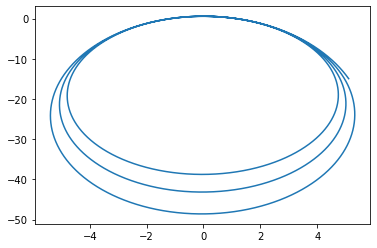

In [9]:
plt.plot(solv.x[:,0]/AU, solv.x[:,1]/AU)

In [10]:
for x in solv.x[:, 0]:
    print(x)

0.0
109200000.0
218400000.0
327599913.9323337
436799655.7301297
545999139.3279709
655198278.6625532
764396987.6733453
873595180.3032476
982792770.4992508
1091989672.2130952
1201185799.4019296
1310381066.02897
1419575386.064158
1528768673.4848192
1637960842.276322
1747151806.4327345
1856341479.9574842
1965529776.8640146
2074716611.1764424
2183901896.930216
2293085548.1727705
2402267478.9641876
2511447603.377849
2620625835.5010943
2729802089.435877
2838976279.299419
2948148319.2248673
3057318123.3619475
3166485605.8776197
3275650680.9567323
3384813262.802675
3493973265.638033
3603130603.7052407
3712285191.2672334
3821436942.6080995
3930585772.0337324
4039731593.872482
4148874322.4758043
4258013872.218914
4367150157.501432
4476283092.748036
4585412592.409109
4694538570.961387
4803660942.908606
4912779622.78215
5021894525.141701
5131005564.575875
5240112655.702879
5349215713.171147
5458314651.659988
5567409385.880229
5676499830.574855
5785585900.519653
5894667510.523856
6003744575.4307785


KeyboardInterrupt: 